In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('covid_clinical_trials.csv')

print(df.shape)

df.head()

(5783, 27)


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [2]:
# Check missing values

In [3]:
df.isnull().sum()

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64

In [4]:
df.drop(['Results First Posted', 'Study Documents'], axis=1, inplace=True)

In [5]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(f"Missing {col}", inplace=True)

C:\Users\krish\AppData\Local\Temp\ipykernel_13732\3483844190.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(f"Missing {col}", inplace=True)


In [6]:
# Handle missing categorical data

In [7]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(f"Missing {col}")


In [8]:
# Verify cleaning

In [9]:
df.isnull().sum()

Rank                        0
NCT Number                  0
Title                       0
Acronym                     0
Status                      0
Study Results               0
Conditions                  0
Interventions               0
Outcome Measures            0
Sponsor/Collaborators       0
Gender                      0
Age                         0
Phases                      0
Enrollment                 34
Funded Bys                  0
Study Type                  0
Study Designs               0
Other IDs                   0
Start Date                  0
Primary Completion Date     0
Completion Date             0
First Posted                0
Last Update Posted          0
Locations                   0
URL                         0
dtype: int64

In [10]:
# Filling missing numeric data in Enrollment with median

In [11]:
median_enrollment = df['Enrollment'].median()
df['Enrollment'].fillna(median_enrollment, inplace=True)


df.isnull().sum()

C:\Users\krish\AppData\Local\Temp\ipykernel_13732\145516709.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Enrollment'].fillna(median_enrollment, inplace=True)


Rank                       0
NCT Number                 0
Title                      0
Acronym                    0
Status                     0
Study Results              0
Conditions                 0
Interventions              0
Outcome Measures           0
Sponsor/Collaborators      0
Gender                     0
Age                        0
Phases                     0
Enrollment                 0
Funded Bys                 0
Study Type                 0
Study Designs              0
Other IDs                  0
Start Date                 0
Primary Completion Date    0
Completion Date            0
First Posted               0
Last Update Posted         0
Locations                  0
URL                        0
dtype: int64

In [12]:
median_enrollment = df['Enrollment'].median()
df['Enrollment'] = df['Enrollment'].fillna(median_enrollment)

In [13]:
# Extract country name from Locations column

In [14]:
df['Country'] = df['Locations'].apply(lambda x: str(x).split(',')[-1].strip())


In [15]:
df['Country'].value_counts().head(10)

Country
United States        1267
France                647
Missing Locations     585
United Kingdom        306
Italy                 235
Spain                 234
Turkey                219
Canada                202
Egypt                 192
China                 171
Name: count, dtype: int64

In [16]:
# Univariate Analysis

In [17]:
# Top 10 contributing countries

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df['Cuontry'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Clinical Trials')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()


KeyError: 'Cuontry'

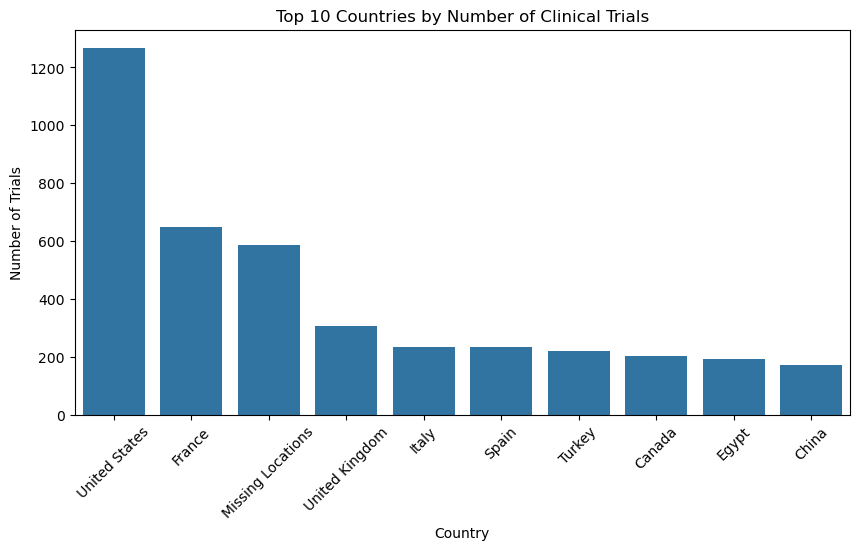

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Clinical Trials')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()


In [20]:
# Status distribution of trials

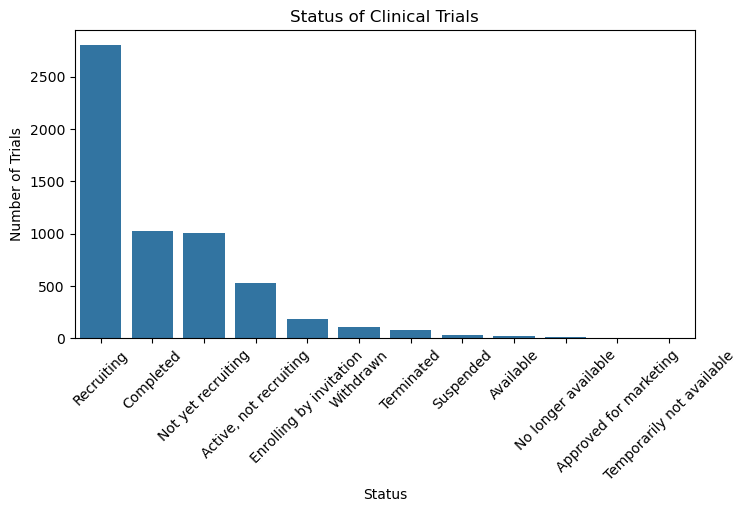

In [21]:
status_counts = df['Status'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Status of Clinical Trials')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()


In [22]:
Phases distributing

SyntaxError: invalid syntax (343489432.py, line 1)

In [23]:
# Phases distributing

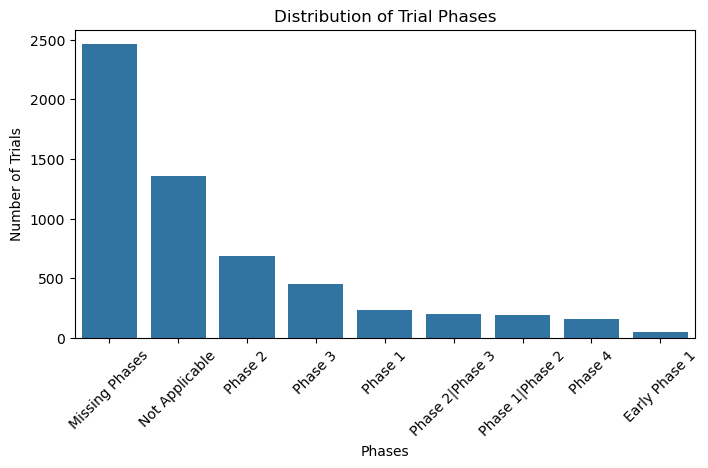

In [24]:
phase_counts = df['Phases'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=phase_counts.index, y=phase_counts.values)
plt.title('Distribution of Trial Phases')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Age group distribution

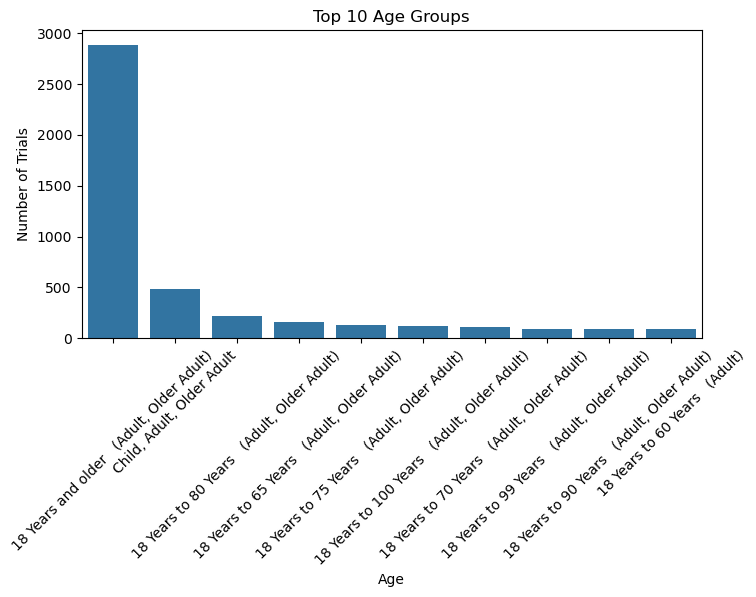

In [26]:
age_counts = df['Age'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=age_counts.index, y=age_counts.values)
plt.title('Top 10 Age Groups')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Status vs. Phases

<Figure size 1000x500 with 0 Axes>

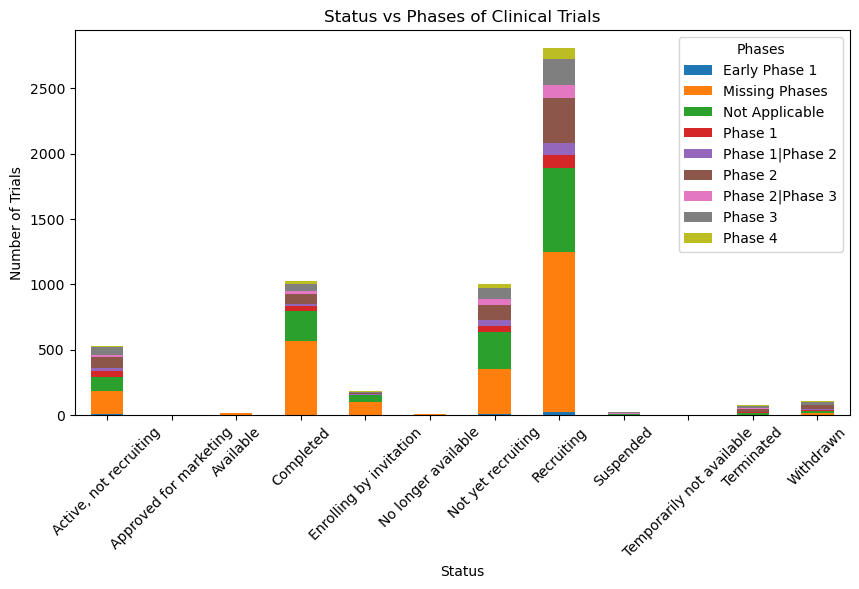

In [28]:
status_phase = pd.crosstab(df['Status'], df['Phases'])

plt.figure(figsize=(10,5))
status_phase.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Status vs Phases of Clinical Trials')
plt.ylabel('Number of Trials')
plt.xticks(rotation=45)
plt.show()

In [29]:
conditions_outcomes = df.groupby('Conditions')['Outcome Measures'] \
                        .apply(lambda x: ', '.join(x.astype(str))) \
                        .reset_index()

conditions_outcomes.head()

,Conditions,Outcome Measures
0,2019 Novel Coronavirus,Proportion of participants who improve by at l...
1,2019 Novel Coronavirus Infection,new-onset COVID-19|Number of Participants with...
2,2019 Novel Coronavirus Infection|COVID-19 Viru...,Number of participants with treatment emergent...
3,2019 Novel Coronavirus Pneumonia,Clinical recovery time|Complete fever time|Cou...
4,2019 Novel Coronavirus Pneumonia|COVID-19,Pneumonia severity index|Oxygenation index (Pa...


In [30]:
# Time Series Analysis

In [31]:
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')


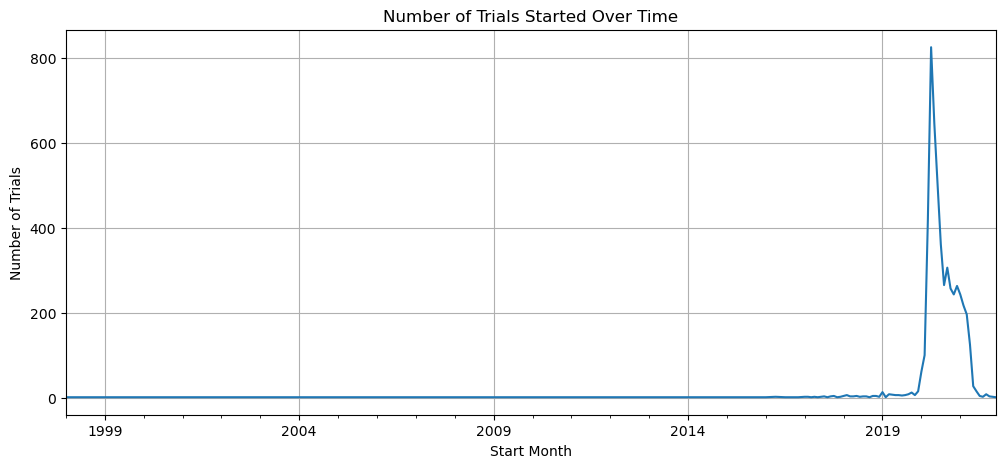

In [32]:
trials_over_time = df['Start Date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12,5))
trials_over_time.plot(kind='line')
plt.title('Number of Trials Started Over Time')
plt.ylabel('Number of Trials')
plt.xlabel('Start Month')
plt.grid(True)
plt.show()


In [33]:
trials_over_time.sort_values(ascending=False).head(10)


Start Date
2020-04    825
2020-05    645
2020-06    502
2020-03    417
2020-07    361
2020-09    306
2020-08    265
2020-12    263
2020-10    257
2020-11    243
Freq: M, Name: count, dtype: int64

In [34]:
# Conclusion:

# The majority of clinical trials are concentrated in a few countries — United States, France, and the United Kingdom lead the list.

# Most trials are in the "Completed" and "Recruiting" status, with a wide variation in trial phases.

# Adult populations are the primary target group for most trials.

# There was a significant increase in trial activity during the early months of the COVID-19 pandemic, followed by fluctuations over time.

# Data cleaning was essential — we handled missing values for categorical and numeric features, and extracted Country from Locations for better analysis.

In [35]:
df.to_csv('cleaned_covid_clinical_trials.csv', index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!
